In [ ]:
# 2602112215 - Darrius Salim

# No 2

## A.

In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [ ]:
# Load Dataset
df = pd.read_csv("data_2B.csv")

In [ ]:
# Parse Tanggal dan Buat Kolom Tanggal
df["Date"] = pd.to_datetime(df["Date"])
df['DateOnly'] = df['Date'].dt.date

In [ ]:
# Hitung Jumlah Tweet per Hari
tweet_per_day = df.groupby("DateOnly").size()

In [ ]:
# Data Cleaning
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # hapus link
    text = re.sub(r"@\w+", "", text)     # hapus mention
    text = re.sub(r"#\w+", "", text)     # hapus hashtag
    text = re.sub(r"[^\w\s]", "", text)  # hapus tanda baca
    text = re.sub(r"\d+", "", text)      # hapus angka
    return text.lower().strip()          # huruf kecil dan strip spasi

In [ ]:
# Clean Tweet Column
df["clean_tweet"] = df["Tweet"].apply(clean_text)

In [ ]:
# Gabungkan Semua Tweet untuk Word Cloud
all_text = " ".join(df["clean_tweet"].dropna())

In [ ]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

In [ ]:
# Plot Distribusi Tweet dan Word Cloud
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2023-05-09'),
  Text(1, 0, '2023-05-10'),
  Text(2, 0, '2023-05-11'),
  Text(3, 0, '2023-05-12'),
  Text(4, 0, '2023-05-13'),
  Text(5, 0, '2023-05-14'),
  Text(6, 0, '2023-05-15'),
  Text(7, 0, '2023-05-16'),
  Text(8, 0, '2023-05-17')])

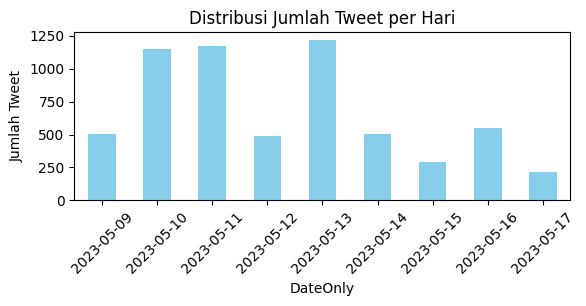

In [ ]:
# Plot distribusi tweet
plt.subplot(2, 1, 1)
tweet_per_day.plot(kind="bar", color="skyblue")
plt.title("Distribusi Jumlah Tweet per Hari")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=45)

Penjelasan Grafik:
- Puncak percakapan terjadi pada 13 Mei 2023, dengan jumlah tweet melampaui 1200 tweet, menandakan hari tersebut mungkin terjadi perkembangan signifikan terkait kasus ransomware di BSI.
- Tanggal 10 dan 11 Mei juga menunjukkan lonjakan tweet yang tinggi—masing-masing lebih dari 1000 tweet—yang mungkin merupakan awal dari penyebaran informasi atau reaksi publik terhadap kejadian tersebut.
- Menjelang 17 Mei, intensitas tweet mulai menurun drastis, mengindikasikan bahwa isu ini mulai mereda dalam percakapan publik.
Interpretasinya: pola ini menunjukkan bahwa pengguna Twitter sangat responsif terhadap kejadian besar seperti serangan siber, terutama pada saat informasi baru muncul atau saat isu sedang hangat-hangatnya dibicarakan.


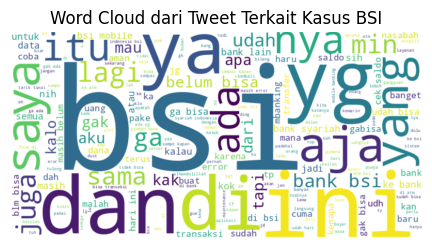

In [ ]:
# Plot word cloud
plt.subplot(2, 1, 2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud dari Tweet Terkait Kasus BSI")

plt.tight_layout()
plt.show()

Beberapa kata yang sangat menonjol antara lain:
- "bsi" – jelas ini topik utama, menandakan tweet membahas langsung insiden pada Bank Syariah Indonesia.
- "saya", "aku" – kata ganti personal ini menunjukkan tweet banyak berasal dari pengalaman langsung pengguna, jadi banyak narasi personal.
- "saldo", "akun", "gak", "gabisa", "belum", "bisa" – kata-kata ini menunjukkan adanya hambatan dalam akses layanan, utamanya terkait saldo atau akun, memperlihatkan frustrasi dan keluhan.
- "nasabah", "bank", "min" – menandakan ada banyak tweet yang bersifat protes atau permintaan bantuan kepada admin/CS bank.
- "syariah" – muncul karena nama bank tersebut, tapi juga bisa menjadi bahan diskusi dari segi layanan berbasis prinsip syariah.


In [ ]:
# Statistik Engagement
print("\nStatistik Engagement:")
print(df[["Replies", "Reetweets", "Likes", "Quotes", "Bookmarks"]].describe())


Statistik Engagement:
           Replies    Reetweets         Likes       Quotes    Bookmarks
count  6100.000000  6100.000000   6100.000000  6100.000000  6100.000000
mean      1.219016     1.718689      4.721148     0.570820     0.567541
std      11.621634    95.703677    210.186777    31.832996    29.244095
min       0.000000     0.000000      0.000000     0.000000     0.000000
25%       0.000000     0.000000      0.000000     0.000000     0.000000
50%       0.000000     0.000000      0.000000     0.000000     0.000000
75%       1.000000     0.000000      0.000000     0.000000     0.000000
max     883.000000  7403.000000  15852.000000  2484.000000  1904.000000


1. Replies:
- Rata-rata hanya 1,22, tapi maksimum mencapai 883—menunjukkan ada beberapa tweet yang viral dan memicu banyak balasan.
- Kuartil ke-25, 50, dan 75 semuanya menunjukkan nilai 0–1, artinya mayoritas tweet tidak dibalas atau hanya sedikit dibalas.
2. Retweets:
- Rata-rata 1,71, tapi nilai maksimum sangat tinggi yaitu 7.403.
- Ini menandakan sebagian kecil tweet mendapat perhatian besar dan disebarkan luas.
- Sebagian besar tweet (50%) tidak mendapat retweet sama sekali.
3. Likes:
- Rata-rata paling tinggi: 4,72, tapi dengan standar deviasi besar (210,19) dan nilai maksimum 15.852!
- Artinya ada outlier—mungkin satu atau dua tweet sangat populer, tapi kebanyakan tidak mendapat banyak likes.
4. Quotes:
- Median 0, rata-rata 0,57, menunjukkan mayoritas tweet tidak di-quote, tapi ada beberapa yang mencapai hingga 2.484.
- Bisa jadi ini tweet yang memancing opini ulang dari pengguna.
5. Bookmarks:
- Rata-rata 0,57, dengan nilai maksimum 1.904.
- Seperti quotes, mayoritas tidak dibookmark, tapi ada sebagian kecil tweet yang dianggap penting atau menarik untuk disimpan.


Penjelasan Table:
- Sebagian besar tweet tidak mendapat banyak interaksi, tapi terdapat outliers dengan engagement sangat tinggi—ciri khas konten viral.
- Pola engagement seperti ini menggambarkan distribusi yang sangat miring (skewed): sebagian besar tweet sepi, beberapa sangat ramai.
- Tweet dengan retweet, like, atau quote tertinggi ini bisa dianalisis lebih lanjut—mereka mungkin memegang peran penting dalam membentuk opini publik tentang insiden BSI.


## B.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=2000, stop_words=stopwords.words('indonesian'))
X_tfidf = vectorizer.fit_transform(df["clean_tweet"])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
# Clustering dan Evaluasi Silhouette
silhouette_scores = {}
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    score = silhouette_score(X_tfidf, kmeans.labels_)
    silhouette_scores[k] = score
    print(f"k = {k} => silhouette score = {score:.4f}")

k = 2 => silhouette score = 0.0110
k = 3 => silhouette score = 0.0129
k = 4 => silhouette score = 0.0138
k = 5 => silhouette score = 0.0176
k = 6 => silhouette score = 0.0170
k = 7 => silhouette score = 0.0195
k = 8 => silhouette score = 0.0196
k = 9 => silhouette score = 0.0202
k = 10 => silhouette score = 0.0229


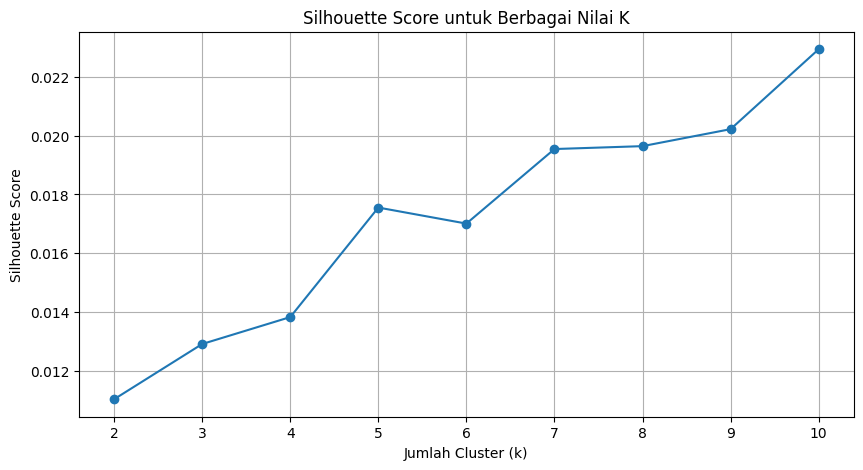

In [ ]:
# Plot Hasil Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Score untuk Berbagai Nilai K")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
# Nilai Tertinggi
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Jumlah cluster terbaik: {best_k} dengan silhouette score: {silhouette_scores[best_k]:.4f}")

Jumlah cluster terbaik: 10 dengan silhouette score: 0.0229


## C.

In [ ]:
import numpy as np

In [ ]:
# Lakukan clustering ulang dengan jumlah k terbaik
best_k = 10
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_tfidf)

In [ ]:
# Tampilkan top word untuk setiap cluster
feature_names = vectorizer.get_feature_names_out()

def get_top_words_per_cluster(tfidf_matrix, labels, n_terms=10):
    cluster_keywords = {}
    for cluster_num in range(best_k):
        indices = np.where(labels == cluster_num)[0]
        mean_tfidf = np.mean(tfidf_matrix[indices], axis=0)
        sorted_words = np.argsort(mean_tfidf.A).flatten()[::-1]
        top_words = [feature_names[i] for i in sorted_words[:n_terms]]
        cluster_keywords[cluster_num] = top_words
    return cluster_keywords

top_words_per_cluster = get_top_words_per_cluster(X_tfidf, df["cluster"])

In [ ]:
# Print hasil dan contoh tweet per cluster
for cluster_id in range(best_k):
    print(f"\n Cluster {cluster_id}")
    print("Top Words:", ", ".join(top_words_per_cluster[cluster_id]))

    sample = df[df["cluster"] == cluster_id].sample(3, random_state=1)
    print("\nContoh Tweet:")
    for t in sample["Tweet"]:
        print("-", t)

    stats = df[df["cluster"] == cluster_id][["Likes", "Reetweets", "Replies"]].describe()
    print("\nStatistik Interaksi:")
    print(stats.loc[["mean", "max"]])


 Cluster 0
Top Words: kak, udah, aja, coba, atm, ya, hati, sih, bsi, dicek

Contoh Tweet:
- @vaniaadwitya_ @bankbsi_id Sama kak, duhh gmn yaa😭
- @Andesbunke @bankbsi_id saya udah bisa transaksi dari hari sabtu kok, dicek berkala aja. kak hati hati yg reply di bawah bukan akun resmi bsi, penipuan nih @bankbsi_id
- @ricarissa @nikenfr1 @RochmatPurwanto @bankbsi_id mjb, beneran tiba2 udah masuk kak?

Statistik Interaksi:
         Likes  Reetweets    Replies
mean  0.052369   0.022444   0.760599
max   1.000000   1.000000  10.000000

 Cluster 1
Top Words: yg, bsi, bank, data, ya, aja, udah, ga, kalo, jg

Contoh Tweet:
- @bankbsi_id Wa'alaikum salam. Terima kasih min, gak ada duit yg ilang dan semua sdh saya pindah ke bank lain. Lama²in deh itu errornya. Oiya, cabang ngaliyan semarang udah mulai galak tuh merespon nasabah 🤭😱
- Tetap Lakukan yg TERBAIK, tp kl endingnya akan DIJUAL piye to??
MIKIIIR!!
@iwanpiliang7
@bankbsi_id 
@erickthohir
- @F2aldi Kalo saya pengguna bank lain kalo mau trans

1. Pengguna Frustrasi karena Gangguan Layanan

a. Cluster yang termasuk: Cluster 2, 4, 5, 6, dan 9

b. Ciri umum:
- Mengeluh tentang gangguan akses layanan seperti mobile banking, ATM, atau transfer yang belum pulih.
- Nada tweet berkisar antara bingung, kecewa, sampai frustrasi.
- Beberapa masih menunggu solusi, sementara yang lain mulai mengancam pindah bank.

c. Menggambarkan: pengguna aktif harian yang terdampak langsung dan sedang dalam fase stres karena tidak bisa bertransaksi.

2. Pengguna yang Butuh Bantuan Langsung dari CS

a. Cluster yang termasuk: Cluster 3 dan sebagian dari Cluster 0

b. Ciri umum:
- Fokus pada permintaan bantuan langsung ke admin lewat DM atau permintaan pengecekan akun.
- Biasanya sopan dan to the point, berharap respons personal.

c.Menggambarkan: nasabah loyal namun bergantung pada customer service, dan mudah kecewa jika respons lambat.

3. Pengamat Kritis & Viral

a. Cluster yang termasuk: Cluster 1 dan Cluster 8

b. Ciri umum:
- Membahas isu serius seperti kebocoran data, reputasi bank, atau kegagalan manajemen.
- Banyak yang viral karena opini keras, sarkastik, atau menyampaikan data penting.
- Nada tweet cenderung tajam, sinis, atau membangun kritik sosial.

c.Menggambarkan: influencer atau opinion leader yang memengaruhi persepsi publik terhadap BSI.

4. Pengguna Informal & Ramah

a. Cluster yang termasuk: Cluster 0 dan 9 (sebagian)

b. Ciri umum:
- Nada kasual, banyak memakai sapaan seperti “ka” dan “kak”.
- Biasanya memberi saran ke sesama pengguna, atau cerita ringan tentang pengalaman.

c. Menggambarkan: komunitas pengguna suportif yang tidak terlalu vokal, tapi aktif dalam komunikasi sosial.

5. Pengguna Emosional & Reaktif

a. Cluster yang termasuk: Cluster 7 dan bagian dari Cluster 6

b. Ciri umum:
- Nada tweet emosional, marah, kadang sarkastis atau satire.
- Ada dorongan aksi (“buruan dong benerin”, “sampai kapan nih?”) atau menyerukan rasa kecewa yang mendalam.

c. Menggambarkan: nasabah yang berada di titik jenuh, dan menjadi pendorong tekanan publik terhadap penyedia layanan.


## D.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Vectorisasi teks dengan CountVectorizer
vectorizer = CountVectorizer(max_features=2000)
X_counts = vectorizer.fit_transform(df["clean_tweet"])

In [ ]:
# Train model LDA
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X_counts)

LatentDirichletAllocation(random_state=42)

In [ ]:
# Tampilkan top words per topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopik {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


Topik 1:
kak, bisa, aku, udah, lagi, ya, aja, coba, atm, sama

Topik 2:
saya, bsi, ke, di, bank, juga, mau, aku, dan, aja

Topik 3:
yg, ada, ini, ga, apa, di, bisa, aja, dan, nasabah

Topik 4:
bsi, bank, syariah, di, yang, dan, indonesia, nasabah, aceh, ini

Topik 5:
data, nya, yang, gak, ada, kena, yg, bsi, itu, ya

Topik 6:
bisa, bsi, ini, di, min, mobile, atm, masih, saya, belum

Topik 7:
bank, bsi, ke, lain, di, syariah, pindah, ini, yg, aja

Topik 8:
ka, coba, saldo, ke, ada, cek, bisa, di, masih, buka

Topik 9:
ini, sampe, mau, bisa, ga, kapan, hari, bsi, dah, gabisa

Topik 10:
bisa, belum, bsi, ini, masuk, transfer, masih, saya, gak, ke


Metode topic extraction yang digunakan adalah Latent Dirichlet Allocation (LDA), yaitu teknik pemodelan topik yang memetakan kumpulan dokumen (dalam hal ini tweet) ke dalam sejumlah topik tersembunyi berdasarkan distribusi kata. Proses dimulai dengan pembersihan data teks dan konversi ke format numerik menggunakan CountVectorizer untuk membentuk document-term matrix. Model LDA kemudian dilatih untuk mengidentifikasi 10 topik utama, masing-masing direpresentasikan oleh sekumpulan kata kunci berfrekuensi tinggi yang secara statistik relevan dalam membentuk tema tertentu. Hasilnya memungkinkan pemetaan topik seperti keluhan teknis, isu keamanan data, atau interaksi dengan layanan pelanggan, yang memberikan landasan penting dalam memahami dinamika percakapan publik terkait kasus BSI.

## E.

In [ ]:
# Tampilkan top words per topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topik {topic_idx+1}"] = top_words
        print(f"\n🟨 Topik {topic_idx+1}: {', '.join(top_words)}")
    return topics

feature_names = vectorizer.get_feature_names_out()
topics_dict = display_topics(lda_model, feature_names, 10)


🟨 Topik 1: kak, bisa, aku, udah, lagi, ya, aja, coba, atm, sama

🟨 Topik 2: saya, bsi, ke, di, bank, juga, mau, aku, dan, aja

🟨 Topik 3: yg, ada, ini, ga, apa, di, bisa, aja, dan, nasabah

🟨 Topik 4: bsi, bank, syariah, di, yang, dan, indonesia, nasabah, aceh, ini

🟨 Topik 5: data, nya, yang, gak, ada, kena, yg, bsi, itu, ya

🟨 Topik 6: bisa, bsi, ini, di, min, mobile, atm, masih, saya, belum

🟨 Topik 7: bank, bsi, ke, lain, di, syariah, pindah, ini, yg, aja

🟨 Topik 8: ka, coba, saldo, ke, ada, cek, bisa, di, masih, buka

🟨 Topik 9: ini, sampe, mau, bisa, ga, kapan, hari, bsi, dah, gabisa

🟨 Topik 10: bisa, belum, bsi, ini, masuk, transfer, masih, saya, gak, ke


In [ ]:
# Assign top topic to each tweet (dominant topic)
topic_distribution = lda_model.transform(X_counts)
df["dominant_topic"] = topic_distribution.argmax(axis=1)

In [ ]:
# Contoh tweet untuk tiap topik
for i in range(10):
    print(f"\n🧠 Contoh Tweet untuk Topik {i+1} ({', '.join(topics_dict[f'Topik {i+1}'][:5])}):")
    examples = df[df["dominant_topic"] == i]["Tweet"].sample(3, random_state=1)
    for tweet in examples:
        print("-", tweet)


🧠 Contoh Tweet untuk Topik 1 (kak, bisa, aku, udah, lagi):
- @sajikyu @bankbsi_id Noooo. Aktivasi ulang ga akan bisa kak percayaaa. Aku udh nyoba dari kmaren pagi. Ntahlah kalo ke kantor cabangnya
- @raaadhitaa @jjunieraa @bankbsi_id pakee bi fast atau metode online tf nya td kak?
- @cassienirmala @bankbsi_id Dongok

🧠 Contoh Tweet untuk Topik 2 (saya, bsi, ke, di, bank):
- @juliani__windi @gulrsshppy @ajiees7x @bankbsi_id Lebih baik tarik tunai aja ka.. aku juga mindahin uang aku smua tarik tunai dlu, udh gitu baru masukin ke rek bank lain ke banknya langsung.. ribet klo trf ky gtu trus gk masuk.. 😫
- @nopal___ @secgron @bankbsi_id Awas gagal wisuda ntar gegara nyebar hoax
- @convomfs ga kebayang tuh call centernya @bankbsi_id udah diomelin brp nasabah yg hard complaint, semangat ya guysss 🥹

🧠 Contoh Tweet untuk Topik 3 (yg, ada, ini, ga, apa):
- @widodotesla @AnakPisangan @secgron @bankbsi_id Nggak perlu, per tweet berikut cuma makan 5 jam untuk ransomwarenya exfiltrate 1.5TB data 

Clustering berfokus pada pola perilaku pengguna, membentuk persona berdasarkan cara mereka mengekspresikan keluhan, pertanyaan, atau opini. Misalnya, kita dapat mengidentifikasi kelompok yang frustrasi karena layanan, pengamat kritis, pengguna suportif, hingga nasabah yang emosional. Setiap cluster mencerminkan gaya komunikasi dan tingkat urgensi yang berbeda, yang sangat berguna untuk strategi respons berbasis persona.

Topic extraction (LDA), di sisi lain, mengungkap isi atau substansi utama dari percakapan. Setiap topik menggambarkan narasi yang dominan—mulai dari gangguan teknis, perpindahan dana, keresahan atas keamanan data, sampai interaksi dengan customer service. Misalnya, Topik 5 dan 4 mengangkat isu kebocoran data dan reputasi bank, sedangkan Topik 6 dan 10 menyuarakan gangguan sistem yang belum pulih.

Hal menarik yang berhasil diekstrak:
- Kedua pendekatan menunjukkan bahwa emosi pengguna tersebar dalam spektrum yang luas, dari bingung dan pasrah, hingga marah dan satirikal.
- Terdapat benang merah antara topik dan persona—misalnya, Topik 6 (keluhan layanan) sangat selaras dengan Cluster pengguna frustrasi, dan Topik 1 (interaksi kasual) beririsan dengan Cluster pengguna ramah.
- Beberapa topik memperlihatkan sinyal kuat untuk risiko reputasi, seperti narasi tentang ransomware, perpindahan dana ke bank lain, dan ancaman kehilangan nasabah—yang menjadi perhatian strategis dalam manajemen krisis digital.

Dengan menggabungkan kedua pendekatan ini, kita tidak hanya memahami apa yang dibicarakan, tapi juga siapa yang berbicara dan bagaimana mereka merasakannya.

## F.

LINK VIDEO:https://binusianorg-my.sharepoint.com/personal/darrius_salim_binus_ac_id/_layouts/15/guestaccess.aspx?share=EejyWsR2KopCkSHruVpo1fgBfpF-W0a8IrDHrGdCLwnz7w&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=EQaoX4